In [78]:
#importing necessary libraries


import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,  LSTM, Input


plt.style.use('dark_background')

In [50]:
end = datetime.now()
start = datetime(end.year-7, end.month, end.day)
coin = 'BTC-USD'
coin_data = yf.download(coin, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [51]:
coin_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2018-06-01,7541.450195,7604.729980,7407.339844,7500.700195,4921460224
2018-06-02,7643.450195,7695.830078,7497.259766,7536.720215,4939299840
2018-06-03,7720.250000,7754.890137,7613.040039,7632.089844,4851760128
2018-06-04,7514.470215,7753.819824,7474.040039,7722.529785,4993169920
2018-06-05,7633.759766,7643.229980,7397.000000,7500.899902,4961739776


In [52]:
coin_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-05-28,107802.328125,109298.289062,106812.929688,108992.171875,49155377493
2025-05-29,105641.757812,108910.046875,105374.398438,107795.570312,56022752042
2025-05-30,103998.570312,106308.945312,103685.789062,105646.210938,57655287183
2025-05-31,104638.093750,104927.101562,103136.117188,103994.718750,38997843858
2025-06-01,104093.898438,104730.562500,103842.289062,104644.937500,35691380736


In [53]:
coin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2558 entries, 2018-06-01 to 2025-06-01
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   2558 non-null   float64
 1   (High, BTC-USD)    2558 non-null   float64
 2   (Low, BTC-USD)     2558 non-null   float64
 3   (Open, BTC-USD)    2558 non-null   float64
 4   (Volume, BTC-USD)  2558 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 119.9 KB


In [54]:
coin_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,2558.000000,2558.000000,2558.000000,2558.000000,2.558000e+03
mean,33102.673173,33770.486903,32333.526514,33066.487179,2.903521e+10
std,26617.118953,27123.019616,26027.968540,26586.333772,2.008571e+10
min,3236.761719,3275.377930,3191.303467,3236.274658,2.923670e+09
25%,9477.650635,9613.519531,9288.606689,9472.798828,1.602001e+10
50%,26841.619141,27225.270508,26459.482422,26825.655273,2.586007e+10
75%,48923.574219,49981.132812,47225.007812,48908.553711,3.741904e+10
max,111673.281250,111970.171875,109285.070312,111679.359375,3.509679e+11


In [55]:
#checking closing price data
close_price = coin_data[['Close']]
close_price

Price,Close
Ticker,BTC-USD
Date,
2018-06-01,7541.450195
2018-06-02,7643.450195
2018-06-03,7720.250000
2018-06-04,7514.470215
2018-06-05,7633.759766
...,...
2025-05-28,107802.328125
2025-05-29,105641.757812


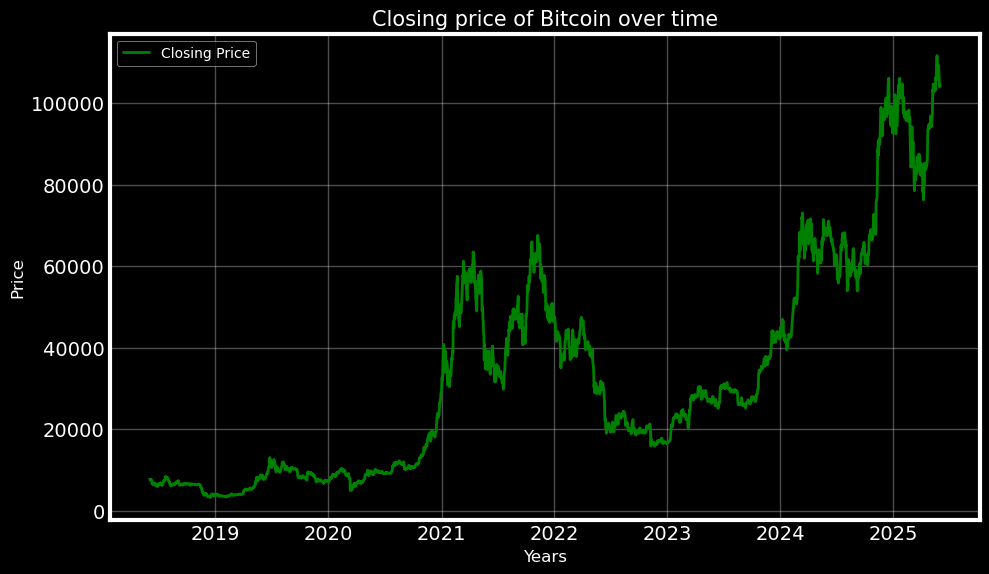

In [56]:
#plotting closing price data
plt.figure(figsize= (10, 6))
plt.plot(close_price.index, close_price['Close'], label = 'Closing Price', color = 'green', linewidth = 2)
plt.title("Closing price of Bitcoin over time", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.show()

In [ ]:
# Getting the moving average
for i in range(2018, 2025):
    print(i, list(coin_data.index.year).count(i))

2018 214
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [58]:
close_price['MA_365'] = close_price['Close'].rolling(window=365).mean()
close_price['MA_215'] = close_price['Close'].rolling(window=215).mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4200\2086500923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_price['MA_365'] = close_price['Close'].rolling(window=365).mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_4200\2086500923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_price['MA_215'] = close_price['Close'].rolling(window=215).mean()


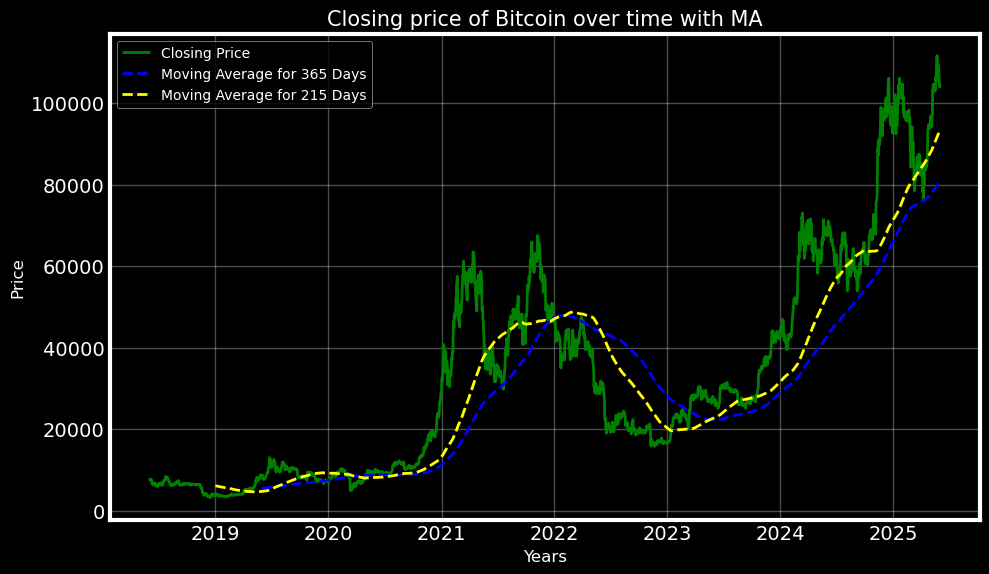

In [ ]:
#plotting closing price data
plt.figure(figsize= (10, 6))
plt.plot(close_price.index, close_price['Close'], label = 'Closing Price', color = 'green', linewidth = 2)
plt.plot(close_price.index, close_price['MA_365'], label = 'Moving Average for 365 Days', color = 'blue', linestyle="--", linewidth = 2)
plt.plot(close_price.index, close_price['MA_200'], label = 'Moving Average for 200 Days', color = 'yellow', linestyle="--", linewidth = 2)
plt.title("Closing price of Bitcoin over time with MA", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.show()

In [68]:
# scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_price[['Close']].dropna())
scaled_data

array([[0.03969777],
       [0.04063842],
       [0.04134666],
       ...,
       [0.92922393],
       [0.9351216 ],
       [0.93010304]])

In [ ]:
# Preparing data for LSTM 
x_data = []
y_data = []
base_days = 200
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

# Splitting into training and testing data for model traning
train_size = int(len(x_data) * 0.9)
x_train, y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]


In [85]:
model = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(128, return_sequences = True), 
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)

])
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 200, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
model.fit(x_train, y_train, batch_size=5, epochs=10)

Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 75s 164ms/step - loss: 0.0036
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 63s 148ms/step - loss: 4.4479e-04
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 64s 149ms/step - loss: 4.0113e-04
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 64s 150ms/step - loss: 3.0609e-04
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 65s 154ms/step - loss: 2.3495e-04
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 65s 152ms/step - loss: 1.9799e-04
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 65s 154ms/step - loss: 2.3377e-04
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 65s 154ms/step - loss: 2.3435e-04
Epoch 9/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 66s 155ms/step - loss: 1.8881e-04
Epoch 10/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 66s 155ms/step - loss: 1.7816e-04


In [87]:
predict = model.predict(x_test)
inv_predict = scaler.inverse_transform(predict)
inv_ytest = scaler.inverse_transform(y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


In [90]:
predict
inv_predict
inv_ytest

array([[ 60582.1015625 ],
       [ 60274.5       ],
       [ 62445.08984375],
       [ 63193.0234375 ],
       [ 62851.375     ],
       [ 66046.125     ],
       [ 67041.109375  ],
       [ 67612.71875   ],
       [ 67399.8359375 ],
       [ 68418.7890625 ],
       [ 68362.734375  ],
       [ 69001.703125  ],
       [ 67367.8515625 ],
       [ 67361.40625   ],
       [ 66432.1953125 ],
       [ 68161.0546875 ],
       [ 66642.4140625 ],
       [ 67014.6953125 ],
       [ 67929.296875  ],
       [ 69907.7578125 ],
       [ 72720.4921875 ],
       [ 72339.5390625 ],
       [ 70215.1875    ],
       [ 69482.46875   ],
       [ 69289.2734375 ],
       [ 68741.1171875 ],
       [ 67811.5078125 ],
       [ 69359.5625    ],
       [ 75639.078125  ],
       [ 75904.859375  ],
       [ 76545.4765625 ],
       [ 76778.8671875 ],
       [ 80474.1875    ],
       [ 88701.484375  ],
       [ 87955.8125    ],
       [ 90584.1640625 ],
       [ 87250.4296875 ],
       [ 91066.0078125 ],
       [ 905

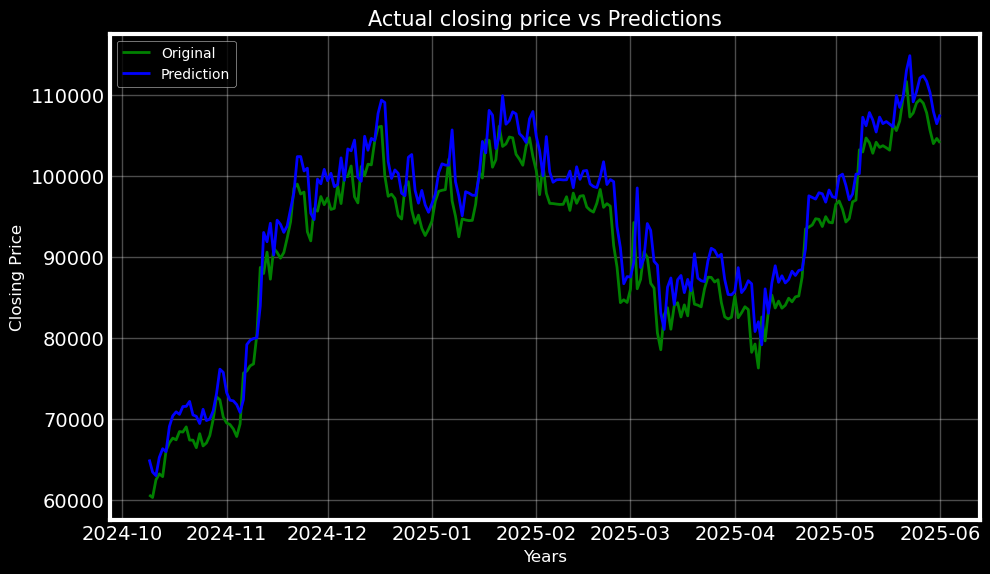

In [92]:
plot_data = pd.DataFrame({'Original':inv_ytest.flatten(), 'Predict':inv_predict.flatten()}, index=close_price.index[train_size + base_days:])

plt.figure(figsize= (10, 6))
plt.plot(plot_data.index, plot_data['Original'], label = 'Original', color = 'green', linewidth = 2)
plt.plot(plot_data.index, plot_data['Predict'], label = 'Prediction', color = 'blue', linewidth = 2)

plt.title("Actual closing price vs Predictions", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.show()

In [98]:
# Predictions for future days
last_100 = scaled_data[-100:].reshape(1, -1, 1)
fut_predict = [] 
for k in range(10):
    fut_days = model.predict(last_100)
    fut_predict.append(scaler.inverse_transform(fut_days))
    last_100 = np.append(last_100[:, 1:, :], fut_days.reshape(1, 1, -1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [99]:
fut_predict

[array([[106949.75]], dtype=float32),
 array([[110323.54]], dtype=float32),
 array([[113858.87]], dtype=float32),
 array([[117286.82]], dtype=float32),
 array([[120513.016]], dtype=float32),
 array([[123526.445]], dtype=float32),
 array([[126348.5]], dtype=float32),
 array([[129001.78]], dtype=float32),
 array([[131496.97]], dtype=float32),
 array([[133832.08]], dtype=float32)]

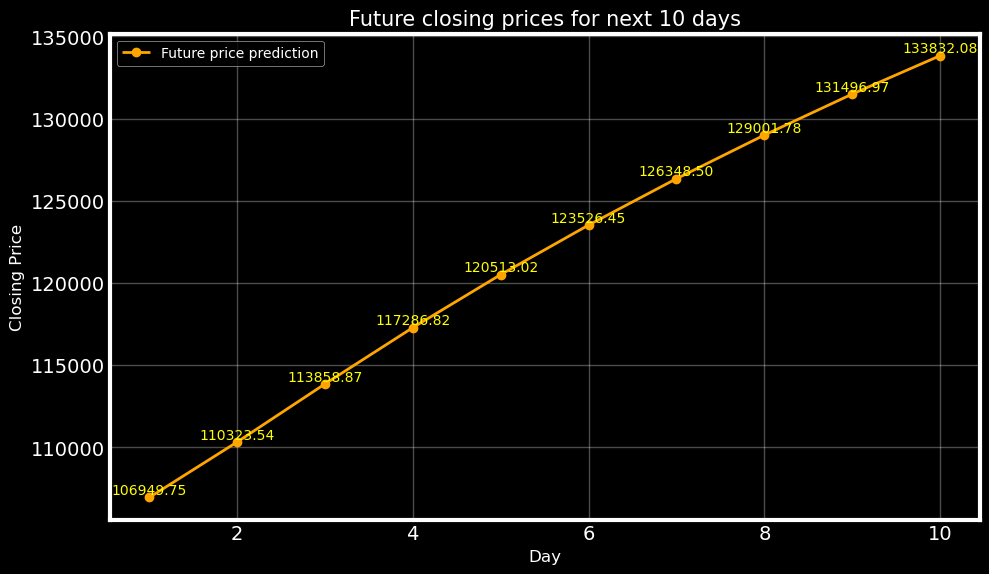

In [100]:
fut_predict = np.array(fut_predict).flatten()

plt.figure(figsize= (10, 6))
plt.plot(range(1, 11), fut_predict, marker='o', label = 'Future price prediction', color = 'orange', linewidth = 2)
for i, val in enumerate(fut_predict):
    plt.text(i+1, val, f'{val:.2f}', fontsize=10, ha='center', va='bottom', color='yellow')

plt.title("Future closing prices for next 10 days", fontsize=15)
plt.xlabel("Day", fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.show()

In [101]:
model.save("btc.keras")